In [3]:
import json

import bz2
import regex
from tqdm import tqdm
from scipy import sparse

In [4]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
responses = []
with open('banki_responses.json', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [00:28, 6986.90it/s]


## –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ –ø–æ NLP # 1 [100 –±–∞–ª–ª–æ–≤]¬∂

#### –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –ø–æ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏

–ó–∞–¥–∞—á–∞: –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –ø–æ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –æ—Ç–∑—ã–≤—ã –Ω–∞ –±–∞–Ω–∫–∏ (banki.ru).

–î–∞–Ω–Ω—ã–µ: —Ç–µ–∫—Å—Ç—ã –æ—Ç–∑—ã–≤–æ–≤, –¥–æ–ø. –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è, –æ—Ü–µ–Ω–∫–∞ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5.

–¢–µ–∫—Å—Ç—ã —Ö—Ä–∞–Ω—è—Ç—Å—è –≤ json-–∞—Ö –≤ –º–∞—Å—Å–∏–≤–µ responses.

In [6]:
responses[0]

{'city': '–≥. –ú–æ—Å–∫–≤–∞',
 'rating_not_checked': False,
 'title': '–ñ–∞–ª–æ–±–∞',
 'num_comments': 0,
 'bank_license': '–ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562',
 'author': 'uhnov1',
 'bank_name': '–ë–∏–Ω–±–∞–Ω–∫',
 'datetime': '2015-06-08 12:50:54',
 'text': '–î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω–æ–º—É –¥–æ–≥–æ–≤–æ—Ä—É, –∞ —Ç–∞–∫–∂–µ –Ω–µ —è–≤–ª—è—é—Å—å –∫–∞–∫–∏–º-–ª–∏–±–æ –¥—Ä—É–≥–∏–º –ª–∏—Ü–æ–º, –ø–∏—Å—å–º–µ–Ω–Ω–æ  –æ—Ñ–æ—Ä–º–∏–≤—à–∏–º –æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å –±–∞–Ω–∫–æ–º –ø–æ –ø–æ–≤–æ–¥—É —É—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏—è —á—å–µ–π-–ª–∏–±–æ  –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏.  –ù–∞—á–∏–Ω–∞—è —Å –º–∞—Ä—Ç–∞ 2015 –≥–æ–¥–∞ –Ω–∞—á–∞–ª–∏ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –±–µ—Å–∫–æ–Ω–µ—á–Ω—ã–µ –ø–∏—Å—å–º–∞ –∏–∑ –û–û–û "–ü—Ä–∏–º–æ –∫–æ–ª–ª–µ–∫—Ç"–Ω–∞ –º–æ–π –∞–¥—Ä–µ—Å: –≥–æ—Ä–æ–¥ –ú–æ—Å–∫–≤–∞, –£–≤–∞—Ä–æ–≤—Å–∫–∏–π –ø–µ—Ä–µ—É–ª–æ–∫, –¥–æ–º 10, –∫–≤–∞—Ä—Ç–∏—Ä–∞ 111, —Å —É–≥—Ä–æ–∑–∞–º–∏ –æ –≤–æ–∑–±—É–∂–¥–µ–Ω–∏–∏ —É–≥–æ–ª–æ–≤–Ω–æ–≥–æ –¥–µ–ª–∞ –≤ –æ—Ç–Ω

### –ß–∞—Å—Ç—å 1. –ê–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–æ–≤ [40/100]

1. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –∏ –Ω–∞ —Ä–∞–∑–Ω—ã–µ –±–∞–Ω–∫–∏
2. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º—ã –¥–ª–∏–Ω —Å–ª–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö –∏ –≤ —Å–ª–æ–≤–∞—Ö
3. –ù–∞–π–¥–∏—Ç–µ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö:
    * —Å–ª–æ–≤
    * —Å–ª–æ–≤ –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤
    * –ª–µ–º–º
    * —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö


1. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –∫—Ä–∏–≤—ã–µ –¶–∏–ø—Ñ–∞ –∏ –•–∏–ø—Å–∞
2. –û—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–µ –≤–æ–ø—Ä–æ—Å—ã:
    * –∫–∞–∫–æ–µ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –∏–ª–∏ "–∫–ª–∏–µ–Ω—Ç"?
    * —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–∞ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –∏ "–¥–æ–≤–µ—Ä–∏–µ"?

–í –ø–æ–ª–µ "rating_grade" –∑–∞–ø–∏—Å–∞–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –æ—Ç–∑—ã–≤–∞ –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5. 
–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ä—É $tf-idf$, –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏ 
–±–∏–≥—Ä–∞–º—ã –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 5) –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö (—Å –æ—Ü–µ–Ω–∫–æ–π 1)

In [7]:
data = pd.DataFrame.from_dict(responses)
data = data.dropna()

In [68]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º —Ä–µ–µ—Å—Ç—Ä –≥–æ—Ä–æ–¥–æ–≤
from fuzzywuzzy import process
city = data.city.sort_values().unique()
city = list(process.dedupe(city))
city[3000:5500]

array(['–≥. –≥. –ì–µ–ª–µ–Ω–¥–∂–∏–∫ —Å.–î–∏–≤–Ω–æ–º–æ—Ä—Å–∫–æ–µ', '–≥. –≥. –ì–æ—Ä–Ω–æ-–ê–ª—Ç–∞–π—Å–∫',
       '–≥. –≥. –î–æ–ª–≥–æ–ø—Ä—É–¥–Ω—ã–π', '–≥. –≥. –î–æ–º–æ–¥–µ–¥–æ–≤–æ', '–≥. –≥. –ï–π—Å–∫',
       '–≥. –≥. –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥', '–≥. –≥. –ñ–µ–ª–µ–∑–Ω–æ–¥–æ—Ä–æ–∂–Ω—ã–π', '–≥. –≥. –ñ—É–∫–æ–≤—Å–∫–∏–π',
       '–≥. –≥. –ó–∞–ø–æ–ª—è—Ä–Ω—ã–π –ú—É—Ä–º–∞–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å (–ú—É—Ä–º–∞–Ω—Å–∫)',
       '–≥. –≥. –ó–µ–ª–µ–Ω–æ–≥—Ä–∞–¥', '–≥. –≥. –ò–≤–∞–Ω–Ω–æ–≤–æ', '–≥. –≥. –ò—Ä–∫—É—Ç—Å–∫',
       '–≥. –≥. –ö–∞–ª–∞—á–∏–Ω—Å–∫', '–≥. –≥. –ö–∞–ª–∏–Ω–∏–Ω–≥—Ä–∞–¥', '–≥. –≥. –ö–∞–ª—É–≥–∞',
       '–≥. –≥. –ö–∞—à–∏–Ω, –¢–≤–µ—Ä—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–≥. –≥. –ö–∞—à–∏—Ä–∞',
       '–≥. –≥. –ö–∏—Ä–æ–≤, –ö–∏—Ä–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å', '–≥. –≥. –ö–∏—Ä–æ–≤—Å–∫',
       '–≥. –≥. –ö–ª–∏–º–æ–≤—Å–∫', '–≥. –≥. –ö–æ–¥–∏–Ω—Å–∫', '–≥. –≥. –ö–æ–º—Å–æ–º–æ–ª—å—Å–∫-–Ω–∞ –ê–º—É—Ä–µ',
       '–≥. –≥. –ö–æ—Ä–µ–Ω–æ–≤—Å–∫', '–≥. –≥. –ö–æ—Ä–æ–ª–µ–≤, –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª.',
       '–≥. –≥. –ö–æ—Å—Ç—Ä

#### –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ —Å–≤–µ–¥–µ–º –Ω–∞–∑–≤–∞–Ω–∏—è –≥–æ—Ä–æ–¥–æ–≤ –∫ –µ–¥–∏–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É

In [210]:
def str_split (row):
    name = row['city'].split(',')[0].split(' ')
    
    if len(name) > 1:
        
        if name[1] == '–≥.' or name[1] == '–≥–æ—Ä–æ–¥':
            
            name = name[2]
        
        elif name[1][:2] == '–≥.':
        
            name = name[1][2:]
            
        else:
            name = name[1]
    else:
        name = name[0]
    
    return name.lower()


In [211]:
data['city_short'] = data.apply(str_split, axis=1)

In [303]:
city_list = list(data['city_short'].value_counts()[:150].keys())
city_list

['–º–æ—Å–∫–≤–∞',
 '—Å–∞–Ω–∫—Ç-–ø–µ—Ç–µ—Ä–±—É—Ä–≥',
 '–ø—Ä–æ—á–∏–µ',
 '–µ–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥',
 '–Ω–∏–∂–Ω–∏–π',
 '–Ω–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫',
 '—Å–∞–º–∞—Ä–∞',
 '—Ä–æ—Å—Ç–æ–≤-–Ω–∞-–¥–æ–Ω—É',
 '–∫–∞–∑–∞–Ω—å',
 '—á–µ–ª—è–±–∏–Ω—Å–∫',
 '—É—Ñ–∞',
 '–∫—Ä–∞—Å–Ω–æ–¥–∞—Ä',
 '–≤–æ—Ä–æ–Ω–µ–∂',
 '–∫—Ä–∞—Å–Ω–æ—è—Ä—Å–∫',
 '–ø–µ—Ä–º—å',
 '–≤–æ–ª–≥–æ–≥—Ä–∞–¥',
 '—Å–∞—Ä–∞—Ç–æ–≤',
 '–æ–º—Å–∫',
 '–∫–∞–ª–∏–Ω–∏–Ω–≥—Ä–∞–¥',
 '—Ö–∞–±–∞—Ä–æ–≤—Å–∫',
 '–∏—Ä–∫—É—Ç—Å–∫',
 '–≤–ª–∞–¥–∏–≤–æ—Å—Ç–æ–∫',
 '—Ç—é–º–µ–Ω—å',
 '—è—Ä–æ—Å–ª–∞–≤–ª—å',
 '—Ç—É–ª–∞',
 '—Ä—è–∑–∞–Ω—å',
 '–±–∞—Ä–Ω–∞—É–ª',
 '—Ç–æ–º—Å–∫',
 '—É–ª—å—è–Ω–æ–≤—Å–∫',
 '—Ç–≤–µ—Ä—å',
 '—Å–ø–±',
 '–∏–∂–µ–≤—Å–∫',
 '–∏–≤–∞–Ω–æ–≤–æ',
 '—Ç–æ–ª—å—è—Ç—Ç–∏',
 '–º–∞–≥–Ω–∏—Ç–æ–≥–æ—Ä—Å–∫',
 '–ª–∏–ø–µ—Ü–∫',
 '–ø–µ–Ω–∑–∞',
 '–º—ã—Ç–∏—â–∏',
 '–æ—Ä–µ–Ω–±—É—Ä–≥',
 '—Å–æ—á–∏',
 '–º—É—Ä–º–∞–Ω—Å–∫',
 '—Å—Ç–∞–≤—Ä–æ–ø–æ–ª—å',
 '—á–µ–±–æ–∫—Å–∞—Ä—ã',
 '–±–∞–ª–∞—à–∏—Ö–∞',
 '–≤–ª–∞–¥–∏–º–∏—Ä',
 '–±–µ–ª–≥–æ—Ä–æ–¥',
 '–ø–æ–¥–æ–ª—å—Å–∫',
 '–∫—É—Ä—Å–∫',
 '–∫–∞–ª—É–≥–∞',
 '–∫–æ—Ä–æ–ª–µ–≤',
 

In [212]:
def big_city (row):

    if row['city_short'] in city_list:
        
        name = row['city_short']
    else:
        name = '–ø—Ä–æ—á–∏–µ'
    return name

In [213]:
data['city_short'] = data.apply(big_city, axis=1)

#### –ü–æ—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –∏ –Ω–∞ —Ä–∞–∑–Ω—ã–µ –±–∞–Ω–∫–∏

In [214]:
data_gr = data.groupby(['city', 'bank_name'])

In [215]:
data_gr.groups

{('moscow', '2–¢ –ë–∞–Ω–∫'): Int64Index([112725], dtype='int64'),
 ('moscow', '–ê–ú–¢ –ë–∞–Ω–∫'): Int64Index([134330, 134346], dtype='int64'),
 ('moscow', '–ê–ª—å—Ñ–∞-–ë–∞–Ω–∫'): Int64Index([71046, 94529, 124813], dtype='int64'),
 ('moscow', '–ë–ò–ù–ë–ê–ù–ö –∫—Ä–µ–¥–∏—Ç–Ω—ã–µ –∫–∞—Ä—Ç—ã'): Int64Index([111926], dtype='int64'),
 ('moscow', '–í–¢–ë 24'): Int64Index([131176], dtype='int64'),
 ('moscow', '–í–∏—Ç–∞—Å –ë–∞–Ω–∫'): Int64Index([138217], dtype='int64'),
 ('moscow', '–ú–¢–° –ë–∞–Ω–∫'): Int64Index([73245, 109437], dtype='int64'),
 ('moscow', '–ú–∞—Å—Ç–µ—Ä-–ë–∞–Ω–∫'): Int64Index([125741], dtype='int64'),
 ('moscow', '–ú–æ—Å–∫–æ–≤—Å–∫–∏–π –ö—Ä–µ–¥–∏—Ç–Ω—ã–π –ë–∞–Ω–∫'): Int64Index([77227], dtype='int64'),
 ('moscow', '–ú–æ—Å–∫–æ–≤—Å–∫–∏–π –û–±–ª–∞—Å—Ç–Ω–æ–π –ë–∞–Ω–∫'): Int64Index([115522], dtype='int64'),
 ('moscow', '–ù–æ—Ä–¥–µ–∞ –ë–∞–Ω–∫'): Int64Index([124075], dtype='int64'),
 ('moscow', '–û–¢–ü –ë–∞–Ω–∫'): Int64Index([123608], dtype='int64'),
 ('moscow', '–û–∫–µ–∞–Ω –ë–∞–Ω–∫'): In

In [308]:
df = data_gr.count()['text']
df

city_short  bank_name              
moscow      2–¢ –ë–∞–Ω–∫                    1
            –ê–ú–¢ –ë–∞–Ω–∫                   2
            –ê–ª—å—Ñ–∞-–ë–∞–Ω–∫                 3
            –ë–ò–ù–ë–ê–ù–ö –∫—Ä–µ–¥–∏—Ç–Ω—ã–µ –∫–∞—Ä—Ç—ã    1
            –í–¢–ë 24                     1
                                      ..
—è—Ä–æ—Å–ª–∞–≤–ª—å   –≠–∫—Å–ø–æ–±–∞–Ω–∫                  1
            –Æ–≥—Ä–∞                       5
            –Æ–Ω–∏–ö—Ä–µ–¥–∏—Ç –ë–∞–Ω–∫             1
            –Ø–Ω–¥–µ–∫—Å.–î–µ–Ω—å–≥–∏              1
            –Ø—Ä–æ—Å–ª–∞–≤–∏—á                  1
Name: text, Length: 6098, dtype: int64

In [322]:
df_city_bank = (pd.concat([df.to_frame(),
           df.sum(level=0).to_frame()
                 .assign(bank_name= "1_TOTAL")
                 .set_index('bank_name', append=True)],axis=0)
  .sort_index())
#df_city_bank.head(30)
df_city_bank.reset_index().sort_values('text', ascending=False).head(30)

city_short                  bank_name   text
2306           –º–æ—Å–∫–≤–∞                    1_TOTAL  33571
4568  —Å–∞–Ω–∫—Ç-–ø–µ—Ç–µ—Ä–±—É—Ä–≥                    1_TOTAL   8281
3735           –ø—Ä–æ—á–∏–µ                    1_TOTAL   5134
2594           –º–æ—Å–∫–≤–∞            –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏   4773
2331           –º–æ—Å–∫–≤–∞                 –ê–ª—å—Ñ–∞-–ë–∞–Ω–∫   2105
2580           –º–æ—Å–∫–≤–∞           –†—É—Å—Å–∫–∏–π –°—Ç–∞–Ω–¥–∞—Ä—Ç   1709
3898           –ø—Ä–æ—á–∏–µ            –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏   1676
2374           –º–æ—Å–∫–≤–∞                     –í–¢–ë 24   1578
4722  —Å–∞–Ω–∫—Ç-–ø–µ—Ç–µ—Ä–±—É—Ä–≥            –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏   1430
2491           –º–æ—Å–∫–≤–∞  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –ö—Ä–µ–¥–∏—Ç–Ω—ã–π –ë–∞–Ω–∫   1412
2660           –º–æ—Å–∫–≤–∞           –•–æ—É–º –ö—Ä–µ–¥–∏—Ç –ë–∞–Ω–∫   1329
995      –µ–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥                    1_TOTAL   1300
2912           –Ω–∏–∂–Ω–∏–π                    1_TOTAL   1236
3084      –Ω–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫                    1_TOTAL   1193
2503           –º–æ—Å–∫–≤–∞  –ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ë–∞–Ω–∫ ¬´–¢—Ä–∞—Å—Ç¬ª   1079
2550           –º–æ—Å–∫–≤–∞             –†–∞–π—Ñ—Ñ–∞–π–∑–µ–Ω–±–∞–Ω–∫    990
2629           –º–æ—Å–∫–≤–∞              –¢–∏–Ω—å–∫–æ—Ñ—Ñ –ë–∞–Ω–∫    968
4395           —Å–∞–º–∞—Ä–∞                    1_TOTAL    961
4176   —Ä–æ—Å—Ç–æ–≤-–Ω–∞-–¥–æ–Ω—É                    1_TOTAL    950
2357           –º–æ—Å–∫–≤–∞                –ë–∞–Ω–∫ –ú–æ—Å–∫–≤—ã    888
2676           –º–æ—Å–∫–≤–∞             –Æ–Ω–∏–ö—Ä–µ–¥–∏—Ç –ë–∞–Ω–∫    833
1399           –∫–∞–∑–∞–Ω—å                    1_TOTAL    774
2600           –º–æ—Å–∫–≤–∞                   –°–∏—Ç–∏–±–∞–Ω–∫    754
5914        —á–µ–ª—è–±–∏–Ω—Å–∫                    1_TOTAL    752
2596           –º–æ—Å–∫–≤–∞               –°–≤—è–∑–Ω–æ–π –ë–∞–Ω–∫    736
2540           –º–æ—Å–∫–≤–∞              –ü—Ä–æ–º—Å–≤—è–∑—å–±–∞–Ω–∫    687
2557           –º–æ—Å–∫–≤–∞           –†–µ–Ω–µ—Å—Å–∞–Ω—Å –ö—Ä–µ–¥–∏—Ç    672
5688              —É—Ñ–∞                    1_TOTAL    669
1875        –∫—Ä–∞—Å–Ω–æ–¥–∞—Ä                    1_TOTAL    663
708           –≤–æ—Ä–æ–Ω–µ–∂                    1_TOTAL    653

#### –ü–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º—ã –¥–ª–∏–Ω –æ—Ç–∑—ã–≤–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö –∏ –≤ —Å–ª–æ–≤–∞—Ö

In [48]:
data.text.iloc[0]

'–¢–∞–∫–∂–µ –∫–∞–∫ –∏ –º–Ω–æ–≥–∏–µ –¥–∞–≤–Ω–∏–π –∫–ª–∏–µ–Ω—Ç –±–∞–Ω–∫–∞, –±—ã–ª –¥–æ–≤–æ–ª–µ–Ω –≤ –≤—ã—Å—à–µ–π —Å—Ç–µ–ø–µ–Ω–∏. –°–∫–æ–ª—å–∫–æ –¥—Ä—É–∑–µ–π –∏ –∑–Ω–∞–∫–æ–º—ã—Ö –ø—Ä–∏–≤–µ–ª - –¥–∞–∂–µ –Ω–µ —Å–æ—Å—á–∏—Ç–∞—Ç—å. –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –º–æ–µ–π –∫–æ–º–ø–∞–Ω–∏–∏ –ø–µ—Ä–µ—à–ª–∏ –Ω–∞ –∑–∞—Ä–ø–ª–∞—Ç–Ω—ã–π –ø—Ä–æ–µ–∫—Ç –≤ –¢–∏–Ω—å–∫–æ—Ñ—Ñ. –ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –≤—Å–µ –¥—Ä—É–∑—å—è –∑–∞–≤–µ–ª–∏ —Å–µ–±–µ –∫–∞—Ä—Ç—ã –∏ –≤–∫–ª–∞–¥—ã. –ù–æ —Ç–æ, —á—Ç–æ —Ç–≤–æ—Ä–∏—Ç—Å—è –≤ –ø–æ—Å–ª–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –ø—Ä–æ—Å—Ç–æ —à–æ–∫–∏—Ä—É–µ—Ç –º–µ–Ω—è: 1) "–£–Ω–∏—Ñ–∏–∫–∞—Ü–∏—è" –≤–∫–ª–∞–¥–æ–≤. –í —Å—Ç—Ä–∞—à–Ω–æ–º —Å–Ω–µ –Ω–µ –º–æ–≥–ª–æ –ø—Ä–∏—Å–Ω–∏—Ç—å—Å—è, —á—Ç–æ –º–æ–≥—É—Ç —Å–Ω–∏–∑–∏—Ç—å –ø—Ä–æ—Ü–µ–Ω—Ç—ã –Ω–∞ –ø–æ–ø–æ–ª–Ω–µ–Ω–∏–µ –≤–∫–ª–∞–¥–∞ (—Å 18 –¥–æ 13%). –û—Ç–≤–µ—Ç –ø–æ —ç—Ç–æ–º—É –ø—É–Ω–∫—Ç—É —á–∏—Ç–∞–ª. –ú–æ–≥–ª–∏ –±—ã —Ç–æ–≥–¥–∞ —Ä–∞–∑—Ä–µ—à–∏—Ç—å –±–µ—Å–ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ –∑–∞–∫—Ä—ã—Ç—å –≤–∫–ª–∞–¥—ã, –∫–æ—Ç–æ—Ä—ã–µ –±—ã–ª–∏ –æ—Ç–∫—Ä—ã—Ç—ã —Ö–æ—Ç—è –±—ã –≤ –∞–ø—Ä

In [428]:
def split_word (row):

    text = row['text']
    count = len(text.split())
        
    return count

In [431]:
from nltk.tokenize import sent_tokenize, word_tokenize
import re

def tokenize (row):
    
    regex = re.compile("[–ê-–Ø–∞-—è–Å—ë]+")
    
    text = row['text']
    list_words = word_tokenize(" ".join(regex.findall(text)))
    count_token = len(list_words)
        
    return count_token

In [432]:
data['count_word_slash'] = data.apply(split_word, axis=1)
data['count_word_token'] = data.apply(tokenize, axis=1)
data['count_sim'] = data.apply(lambda x: len(str(x['text'])), axis=1)

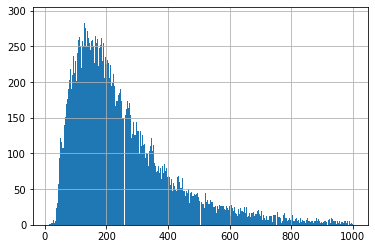

In [433]:
# –¥–ª–∏–Ω–∞ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Å–ª–æ–≤–∞—Ö –ø–æ –ø—Ä–æ–±–µ–ª–∞–º
data.count_word_slash.hist(bins=1000, range=(12, 1000))

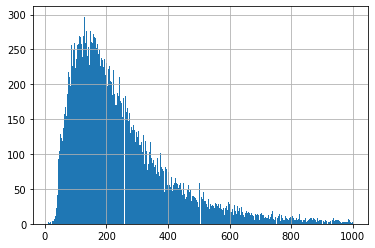

In [434]:
# –¥–ª–∏–Ω–∞ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Å–ª–æ–≤–∞—Ö –±–µ–∑ —É—á–µ—Ç–∞ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏ –∏ —Å –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ–º NLTK
data.count_word_token.hist(bins=1000, range=(12, 1000))

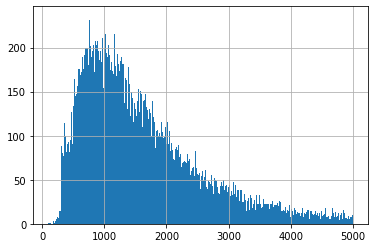

In [419]:
# –¥–ª–∏–Ω–∞ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö
data.count_sim.hist(bins=1000, range=(100, 5000))

#### –ù–∞–π–¥–µ–º 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö: —Å–ª–æ–≤, —Å–ª–æ–≤ –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤, –ª–µ–º–º, —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö

In [8]:
comments = list(data.text)

In [9]:
from ufal.udpipe import Model, Pipeline
from tqdm import tqdm_notebook as tqdm

In [10]:
model = Model.load("russian-ud-2.0-170801.udpipe") # path to the model

In [ ]:
sents = []
pipeline = Pipeline(model, 'generic_tokenizer', '', '', '')

for i in tqdm(comments, total = len(comments)):
    parsed = pipeline.process(i)
    sents.append(parsed)
sents

In [31]:
f = open('xyz.txt','w')
for index in sents:
    f.write(index)
f.close()

In [37]:
print(sents[0])

# newdoc
# newpar
# sent_id = 1
# text = –¢–∞–∫–∂–µ –∫–∞–∫ –∏ –º–Ω–æ–≥–∏–µ –¥–∞–≤–Ω–∏–π –∫–ª–∏–µ–Ω—Ç –±–∞–Ω–∫–∞, –±—ã–ª –¥–æ–≤–æ–ª–µ–Ω –≤ –≤—ã—Å—à–µ–π —Å—Ç–µ–ø–µ–Ω–∏.
1	–¢–∞–∫–∂–µ	–¢–ê–ö–ñ–ï	CCONJ	CC	_	2	cc:preconj	_	_
2	–∫–∞–∫	–ö–ê–ö	ADP	IN	_	6	case	_	_
3	–∏	–ò	PART	UH	_	6	discourse	_	_
4	–º–Ω–æ–≥–∏–µ	–ú–ù–û–ì–ò–ô	ADJ	JJL	Animacy=Inan|Case=Nom|Number=Plur	6	amod	_	_
5	–¥–∞–≤–Ω–∏–π	–¥–∞–≤–Ω–∏–π	ADJ	JJL	Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing	6	amod	_	_
6	–∫–ª–∏–µ–Ω—Ç	–∫–ª–∏–µ–Ω—Ç	NOUN	NN	Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing	10	obl	_	_
7	–±–∞–Ω–∫–∞	–ë–ê–ù–ö	NOUN	NN	Animacy=Inan|Case=Gen|Gender=Masc|Number=Sing	6	nmod	_	SpaceAfter=No
8	,	,	PUNCT	,	_	6	punct	_	_
9	–±—ã–ª	–ë–´–¢–¨	AUX	VBC	Aspect=Imp|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin	10	aux:pass	_	_
10	–¥–æ–≤–æ–ª–µ–Ω	–¥–æ–≤–æ–ª–µ–Ω	VERB	VBNH	Animacy=Anim|Aspect=Perf|Case=Nom|Gender=Masc|Number=Sing|Tense=Past|Variant=Short|VerbForm=Part|Voice=Pass	0	root	_	_
11	–≤	–í	ADP	IN	_	13	case	_	_
12	–≤—ã—Å—à–µ–π

In [38]:
from conllu import parse

In [39]:
sentences = parse(sents[0])
sentence = sentences[0]
sentence[0]

{'id': 1,
 'form': '–¢–∞–∫–∂–µ',
 'lemma': '–¢–ê–ö–ñ–ï',
 'upos': 'CCONJ',
 'xpos': 'CC',
 'feats': None,
 'head': 2,
 'deprel': 'cc:preconj',
 'deps': None,
 'misc': None}

In [41]:
except_ = ['ADP', 'PUNCT', 'CCONJ', 'PRON', 'NUM', 'PART']
words = []
lemm = []
noun = []
all_list = []
s_list = []

for i in tqdm(sents, total = len(sents)):
    sentences = parse(i)
    s_list = []
    words = []
    lemm = []
    noun = []
    
    for sentence in sentences:

        for i in sentence:
            if i['upos'] not in except_:
                words.append(i['form'].lower())
                lemm.append(i['lemma'].lower())
                if i['upos'] == 'NOUN':
                    noun.append(i['lemma'].lower())
                else:
                    noun.append('-')
    s_list.append(words)
    s_list.append(lemm)
    s_list.append(noun)
    all_list.append(s_list)

all_list[1]

[['–æ—Ç–∫—Ä—ã—Ç',
  '–≤–∫–ª–∞–¥',
  '—Å—á–µ—Ç',
  'usd',
  '–ø–ª—é—Å',
  '–µ—Å—Ç—å',
  '–∑–∞—Ä–ø–ª–∞—Ç–Ω–∞—è',
  '–∫–∞—Ä—Ç–∞',
  '—Ä—É–±–ª—è—Ö',
  '—Å–µ–≥–æ–¥–Ω—è',
  '–ø—Ä–∏—à–µ–ª',
  '—É–∫–∞–∑–∞–Ω–Ω–æ–µ',
  '–æ—Ç–¥–µ–ª–µ–Ω–∏–µ',
  '—Ü–µ–ª—å—é',
  '–ø–æ–ø–æ–ª–Ω–∏—Ç—å',
  '–¥–æ–ª–ª–∞—Ä–æ–≤—ã–π',
  '—Å—á—ë—Ç',
  'usd',
  '–¥–∞–ª',
  '–æ–ø–µ—Ä–∞—Ü–∏–æ–Ω–∏—Å—Ç—É',
  '–ø–∞—Å–ø–æ—Ä—Ç',
  '–∑–∞—Ä–ø–ª–∞—Ç–Ω—É—é',
  '–∫–∞—Ä—Ç—É',
  '—Ç',
  '–æ–∫–æ—à–∫–µ',
  '–Ω–∞–ø–∏—Å–∞–Ω–æ',
  '–ø—Ä–∏–≥–æ—Ç–æ–≤—å—Ç–µ',
  '–∫–∞—Ä—Ç—É',
  '–ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è',
  '–æ–ø–µ—Ä–∞—Ü–∏–∏',
  '—á—Ç–æ',
  '—Ç–æ',
  '–ø–æ–¥–æ–±–Ω–æ–µ',
  '–ø—Ä–æ—à–ª—ã–π',
  '—Ä–∞–∑',
  '–ø–æ—Ç—Ä–µ–±–æ–≤–∞–ª–∏',
  '—Å–∫–∞–∑–∞–ª',
  '—á—Ç–æ',
  '–Ω—É–∂–Ω–æ',
  '–ø–æ–ª–æ–∂–∏—Ç—å',
  '–¥–µ–Ω—å–≥–∏',
  '–¥–æ–ª–ª–∞—Ä–æ–≤—ã–π',
  '—Å—á–µ—Ç',
  '–æ–ø–µ—Ä–∞—Ü–∏–æ–Ω–∏—Å—Ç',
  '–≤—Å—ë',
  '–≤–∑—è–ª–∞',
  '—á—Ç–æ',
  '—Ç–æ',
  '–¥–µ–ª–∞–ª–∞',
  '–∫—Ä—É—Ç–∏–ª–∞',
  '–≤–µ—Ä—Ç–µ–ª–∞',
  '–≤—Å—Ç–∞–≤–∏–ª–∞',
  '–∫–∞—Ä—Ç—É',
  '—Ç–µ—Ä–º–∏–Ω–∞–ª',


In [42]:
frame = pd.DataFrame(all_list)
frame = frame.rename({0: 'form', 1: 'lemma', 2: 'noun'}, axis='columns')
frame.head()

form  \
0  [–º–Ω–æ–≥–∏–µ, –¥–∞–≤–Ω–∏–π, –∫–ª–∏–µ–Ω—Ç, –±–∞–Ω–∫–∞, –±—ã–ª, –¥–æ–≤–æ–ª–µ–Ω, ...   
1  [–æ—Ç–∫—Ä—ã—Ç, –≤–∫–ª–∞–¥, —Å—á–µ—Ç, usd, –ø–ª—é—Å, –µ—Å—Ç—å, –∑–∞—Ä–ø–ª–∞—Ç...   
2  [–≤—Ä–µ–º–µ–Ω–∏, –≤—á–µ—Ä–∞, –ø–æ—Å—Ç—É–ø–∏–ª–æ, —Å–º—Å, —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–µ, ...   
3  [–≥, —á–∞—Å–æ–≤, –ø—Ä–∏—à–µ–ª, —É–∫–∞–∑–∞–Ω–Ω—ã–π, –æ—Ñ–∏—Å, –Ω–∞–º–µ—Ä–µ–Ω–∏–µ–º...   
4  [–æ–ø–ª–∞—Ç—ã, –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã—Ö, –ø–ª–∞—Ç–µ–∂–µ–π, –ø–æ–ª—å–∑—É—é—Å—å, –ø–ª...   

                                               lemma  \
0  [–º–Ω–æ–≥–∏–π, –¥–∞–≤–Ω–∏–π, –∫–ª–∏–µ–Ω—Ç, –±–∞–Ω–∫, –±—ã—Ç—å, –¥–æ–≤–æ–ª–µ–Ω, ...   
1  [–æ—Ç–∫—Ä—ã—Ç—å, –≤–∫–ª–∞–¥, —Å—á–µ—Ç, usd, –ø–ª—é—Å, –±—ã—Ç—å, –∑–∞—Ä–ø–ª–∞...   
2  [–≤—Ä–µ–º—è, –≤—á–µ—Ä–∞, –ø–æ—Å—Ç—É–ø–∏–ª–æ, —Å–º—Å, —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–µ, —á—Ç...   
3  [–≥, —á–∞—Å, –ø—Ä–∏–π—Ç–∏, —É–∫–∞–∑–∞–Ω–Ω—ã–π, –æ—Ñ–∏—Å, –Ω–∞–º–µ—Ä–µ–Ω–∏–µ–º, ...   
4  [–æ–ø–ª–∞—Ç–∞, –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã—Ö, –ø–ª–∞—Ç–µ–∂–µ–π, –ø–æ–ª—å–∑—É—é—Å—å, –ø–ª...   

                                                noun  
0  [-, -, –∫–ª–∏–µ–Ω—Ç, –±–∞–Ω–∫, -, -, -, —Å—Ç–µ–ø–µ–Ω—å, –¥—Ä—É–≥, -...  
1  [-, –≤–∫–ª–∞–¥, —Å—á–µ—Ç, usd, -, -, -, –∫–∞—Ä—Ç–∞, —Ä—É–±–ª—è—Ö, ...  
2  [–≤—Ä–µ–º—è, -, -, -, —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–µ, -, –±–∞–Ω–∫, -, -, –ø...  
3  [–≥, —á–∞—Å, -, -, –æ—Ñ–∏—Å, –Ω–∞–º–µ—Ä–µ–Ω–∏–µ–º, -, –≤–∫–ª–∞–¥, -, ...  
4  [–æ–ø–ª–∞—Ç–∞, -, –ø–ª–∞—Ç–µ–∂–µ–π, -, -, –∫–∞—Ä—Ç–∞, —Å–∞–π—Ç, –±–∞–Ω–∫,...

In [43]:
from nltk.corpus import stopwords
mystopwords = stopwords.words('russian') + ['—ç—Ç–æ', '–Ω–∞—à' , '—Ç—ã—Å', '–º–ª–Ω', '–º–ª—Ä–¥', '—Ç–∞–∫–∂–µ',  '—Ç', '–¥']

print(mystopwords)

['–∏', '–≤', '–≤–æ', '–Ω–µ', '—á—Ç–æ', '–æ–Ω', '–Ω–∞', '—è', '—Å', '—Å–æ', '–∫–∞–∫', '–∞', '—Ç–æ', '–≤—Å–µ', '–æ–Ω–∞', '—Ç–∞–∫', '–µ–≥–æ', '–Ω–æ', '–¥–∞', '—Ç—ã', '–∫', '—É', '–∂–µ', '–≤—ã', '–∑–∞', '–±—ã', '–ø–æ', '—Ç–æ–ª—å–∫–æ', '–µ–µ', '–º–Ω–µ', '–±—ã–ª–æ', '–≤–æ—Ç', '–æ—Ç', '–º–µ–Ω—è', '–µ—â–µ', '–Ω–µ—Ç', '–æ', '–∏–∑', '–µ–º—É', '—Ç–µ–ø–µ—Ä—å', '–∫–æ–≥–¥–∞', '–¥–∞–∂–µ', '–Ω—É', '–≤–¥—Ä—É–≥', '–ª–∏', '–µ—Å–ª–∏', '—É–∂–µ', '–∏–ª–∏', '–Ω–∏', '–±—ã—Ç—å', '–±—ã–ª', '–Ω–µ–≥–æ', '–¥–æ', '–≤–∞—Å', '–Ω–∏–±—É–¥—å', '–æ–ø—è—Ç—å', '—É–∂', '–≤–∞–º', '–≤–µ–¥—å', '—Ç–∞–º', '–ø–æ—Ç–æ–º', '—Å–µ–±—è', '–Ω–∏—á–µ–≥–æ', '–µ–π', '–º–æ–∂–µ—Ç', '–æ–Ω–∏', '—Ç—É—Ç', '–≥–¥–µ', '–µ—Å—Ç—å', '–Ω–∞–¥–æ', '–Ω–µ–π', '–¥–ª—è', '–º—ã', '—Ç–µ–±—è', '–∏—Ö', '—á–µ–º', '–±—ã–ª–∞', '—Å–∞–º', '—á—Ç–æ–±', '–±–µ–∑', '–±—É–¥—Ç–æ', '—á–µ–≥–æ', '—Ä–∞–∑', '—Ç–æ–∂–µ', '—Å–µ–±–µ', '–ø–æ–¥', '–±—É–¥–µ—Ç', '–∂', '—Ç–æ–≥–¥–∞', '–∫—Ç–æ', '—ç—Ç–æ—Ç', '—Ç–æ–≥–æ', '–ø–æ—Ç–æ–º—É', '—ç—Ç–æ–≥–æ', '–∫–∞–∫–æ–π', '—Å–æ–≤—Å–µ–º', '–Ω–∏–º', '–∑

In [44]:
def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return [token for token in text if not token in mystopwords]
    except:
        return ""

In [45]:
frame['minus_stop'] = frame.form.apply(remove_stopwords)

In [46]:
frame['minus_stop_lemm'] = frame.lemma.apply(remove_stopwords)
frame.head()

form  \
0  [–º–Ω–æ–≥–∏–µ, –¥–∞–≤–Ω–∏–π, –∫–ª–∏–µ–Ω—Ç, –±–∞–Ω–∫–∞, –±—ã–ª, –¥–æ–≤–æ–ª–µ–Ω, ...   
1  [–æ—Ç–∫—Ä—ã—Ç, –≤–∫–ª–∞–¥, —Å—á–µ—Ç, usd, –ø–ª—é—Å, –µ—Å—Ç—å, –∑–∞—Ä–ø–ª–∞—Ç...   
2  [–≤—Ä–µ–º–µ–Ω–∏, –≤—á–µ—Ä–∞, –ø–æ—Å—Ç—É–ø–∏–ª–æ, —Å–º—Å, —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–µ, ...   
3  [–≥, —á–∞—Å–æ–≤, –ø—Ä–∏—à–µ–ª, —É–∫–∞–∑–∞–Ω–Ω—ã–π, –æ—Ñ–∏—Å, –Ω–∞–º–µ—Ä–µ–Ω–∏–µ–º...   
4  [–æ–ø–ª–∞—Ç—ã, –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã—Ö, –ø–ª–∞—Ç–µ–∂–µ–π, –ø–æ–ª—å–∑—É—é—Å—å, –ø–ª...   

                                               lemma  \
0  [–º–Ω–æ–≥–∏–π, –¥–∞–≤–Ω–∏–π, –∫–ª–∏–µ–Ω—Ç, –±–∞–Ω–∫, –±—ã—Ç—å, –¥–æ–≤–æ–ª–µ–Ω, ...   
1  [–æ—Ç–∫—Ä—ã—Ç—å, –≤–∫–ª–∞–¥, —Å—á–µ—Ç, usd, –ø–ª—é—Å, –±—ã—Ç—å, –∑–∞—Ä–ø–ª–∞...   
2  [–≤—Ä–µ–º—è, –≤—á–µ—Ä–∞, –ø–æ—Å—Ç—É–ø–∏–ª–æ, —Å–º—Å, —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–µ, —á—Ç...   
3  [–≥, —á–∞—Å, –ø—Ä–∏–π—Ç–∏, —É–∫–∞–∑–∞–Ω–Ω—ã–π, –æ—Ñ–∏—Å, –Ω–∞–º–µ—Ä–µ–Ω–∏–µ–º, ...   
4  [–æ–ø–ª–∞—Ç–∞, –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã—Ö, –ø–ª–∞—Ç–µ–∂–µ–π, –ø–æ–ª—å–∑—É—é—Å—å, –ø–ª...   

                                                noun  \
0  [-, -, –∫–ª–∏–µ–Ω—Ç, –±–∞–Ω–∫, -, -, -, —Å—Ç–µ–ø–µ–Ω—å, –¥—Ä—É–≥, -...   
1  [-, –≤–∫–ª–∞–¥, —Å—á–µ—Ç, usd, -, -, -, –∫–∞—Ä—Ç–∞, —Ä—É–±–ª—è—Ö, ...   
2  [–≤—Ä–µ–º—è, -, -, -, —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–µ, -, –±–∞–Ω–∫, -, -, –ø...   
3  [–≥, —á–∞—Å, -, -, –æ—Ñ–∏—Å, –Ω–∞–º–µ—Ä–µ–Ω–∏–µ–º, -, –≤–∫–ª–∞–¥, -, ...   
4  [–æ–ø–ª–∞—Ç–∞, -, –ø–ª–∞—Ç–µ–∂–µ–π, -, -, –∫–∞—Ä—Ç–∞, —Å–∞–π—Ç, –±–∞–Ω–∫,...   

                                          minus_stop  \
0  [–º–Ω–æ–≥–∏–µ, –¥–∞–≤–Ω–∏–π, –∫–ª–∏–µ–Ω—Ç, –±–∞–Ω–∫–∞, –¥–æ–≤–æ–ª–µ–Ω, –≤—ã—Å—à–µ...   
1  [–æ—Ç–∫—Ä—ã—Ç, –≤–∫–ª–∞–¥, —Å—á–µ—Ç, usd, –ø–ª—é—Å, –∑–∞—Ä–ø–ª–∞—Ç–Ω–∞—è, –∫...   
2  [–≤—Ä–µ–º–µ–Ω–∏, –≤—á–µ—Ä–∞, –ø–æ—Å—Ç—É–ø–∏–ª–æ, —Å–º—Å, —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–µ, ...   
3  [–≥, —á–∞—Å–æ–≤, –ø—Ä–∏—à–µ–ª, —É–∫–∞–∑–∞–Ω–Ω—ã–π, –æ—Ñ–∏—Å, –Ω–∞–º–µ—Ä–µ–Ω–∏–µ–º...   
4  [–æ–ø–ª–∞—Ç—ã, –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã—Ö, –ø–ª–∞—Ç–µ–∂–µ–π, –ø–æ–ª—å–∑—É—é—Å—å, –ø–ª...   

                                     minus_stop_lemm  
0  [–º–Ω–æ–≥–∏–π, –¥–∞–≤–Ω–∏–π, –∫–ª–∏–µ–Ω—Ç, –±–∞–Ω–∫, –¥–æ–≤–æ–ª–µ–Ω, –≤—ã—Å—à–∏–π...  
1  [–æ—Ç–∫—Ä—ã—Ç—å, –≤–∫–ª–∞–¥, —Å—á–µ—Ç, usd, –ø–ª—é—Å, –∑–∞—Ä–ø–ª–∞—Ç–Ω–∞—è, ...  
2  [–≤—Ä–µ–º—è, –≤—á–µ—Ä–∞, –ø–æ—Å—Ç—É–ø–∏–ª–æ, —Å–º—Å, —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–µ, –±–∞...  
3  [–≥, —á–∞—Å, –ø—Ä–∏–π—Ç–∏, —É–∫–∞–∑–∞–Ω–Ω—ã–π, –æ—Ñ–∏—Å, –Ω–∞–º–µ—Ä–µ–Ω–∏–µ–º, ...  
4  [–æ–ø–ª–∞—Ç–∞, –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã—Ö, –ø–ª–∞—Ç–µ–∂–µ–π, –ø–æ–ª—å–∑—É—é—Å—å, –ø–ª...

In [47]:
from collections import Counter
import itertools

In [48]:
# 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤
cnt_form = Counter(list(itertools.chain(*frame.form.values)))
cnt_form.most_common(10)

[('—á—Ç–æ', 312485),
 ('–±–∞–Ω–∫–∞', 152598),
 ('–±–∞–Ω–∫', 114842),
 ('—Ç–∞–∫', 79365),
 ('—Ç–æ', 76230),
 ('–¥–µ–Ω—å–≥–∏', 72829),
 ('–±—ã–ª–æ', 68701),
 ('–∫–∞—Ä—Ç—É', 61762),
 ('—É–∂–µ', 61485),
 ('–≤—Å–µ', 59121)]

In [49]:
# 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤ –±–µ–∑ —Å—Ç–æ–ø —Å–ª–æ–≤
cnt_minus_stop = Counter(list(itertools.chain(*frame.minus_stop.values)))
cnt_minus_stop.most_common(10)

[('–±–∞–Ω–∫–∞', 152598),
 ('–±–∞–Ω–∫', 114842),
 ('–¥–µ–Ω—å–≥–∏', 72829),
 ('–∫–∞—Ä—Ç—É', 61762),
 ('–∫–∞—Ä—Ç—ã', 57407),
 ('–æ—Ç–¥–µ–ª–µ–Ω–∏–µ', 42904),
 ('–¥–µ–Ω—å', 42289),
 ('–∑–∞—è–≤–ª–µ–Ω–∏–µ', 41102),
 ('–±–∞–Ω–∫–µ', 39940),
 ('–∫—Ä–µ–¥–∏—Ç', 39924)]

In [50]:
# 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö –ª–µ–º–º
cnt_lemm = Counter(list(itertools.chain(*frame.lemma.values)))
cnt_lemm.most_common(10)

[('—á—Ç–æ', 314858),
 ('–±–∞–Ω–∫', 268167),
 ('–±—ã—Ç—å', 248706),
 ('–∫–∞—Ä—Ç–∞', 176332),
 ('—ç—Ç–æ—Ç', 109077),
 ('–¥–µ–Ω—å', 98882),
 ('–¥–µ–Ω—å–≥–∏', 96148),
 ('–æ—Ç–¥–µ–ª–µ–Ω–∏–µ', 89855),
 ('–≤–µ—Å—å', 89832),
 ('—Ç–∞–∫', 79365)]

In [51]:
# 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö
cnt_noun = Counter(list(itertools.chain(*frame.noun.values)))
cnt_noun.most_common(11)

[('-', 8210432),
 ('–±–∞–Ω–∫', 236365),
 ('–∫–∞—Ä—Ç–∞', 173821),
 ('–¥–µ–Ω—å', 97987),
 ('–¥–µ–Ω—å–≥–∏', 94340),
 ('–æ—Ç–¥–µ–ª–µ–Ω–∏–µ', 89589),
 ('—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', 61789),
 ('—Å—É–º–º–∞', 55649),
 ('–≥–æ–¥', 54642),
 ('—Ä–∞–∑', 54499),
 ('–≤—Ä–µ–º—è', 53803)]

#### –ü–æ—Å—Ç—Ä–æ–∏–º –∫—Ä–∏–≤—ã–µ –¶–∏–ø—Ñ–∞ –∏ –•–∏–ø—Å–∞

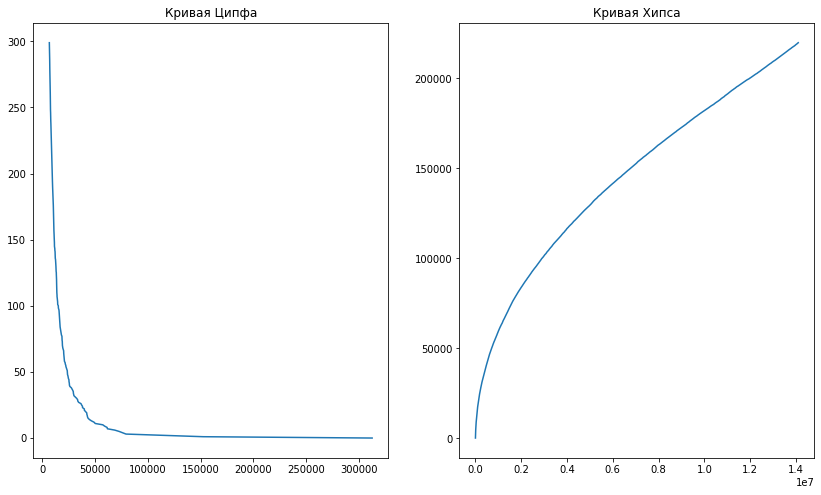

In [52]:
def plot_zipf_hips (fr):
    
    cnt = Counter()
    n_types = []
    n_tokens = []
    tokens = []

    for i in fr.values:
            cnt.update(list(i))
            n_types.append(len(cnt))
            n_tokens.append(np.sum(list(cnt.values())))

    freqs = list(cnt.values())
    freqs = sorted(freqs, reverse = True)
    
    fig, (ax1,ax2) = plt.subplots(ncols=2)
    ax1.plot(freqs[:300], range(300))
    ax1.set_title('–ö—Ä–∏–≤–∞—è –¶–∏–ø—Ñ–∞')
    
    ax2.plot(n_tokens, n_types)
    plt.title('–ö—Ä–∏–≤–∞—è –•–∏–ø—Å–∞')
    
    fig.set_figheight(8)
    fig.set_figwidth(14)
    plt.show()

plot_zipf_hips(frame.form)

#### –û—Ç–≤–µ—Ç–∏–º –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–µ –≤–æ–ø—Ä–æ—Å—ã:
* –∫–∞–∫–æ–µ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –∏–ª–∏ "–∫–ª–∏–µ–Ω—Ç"?
* —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–∞ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –∏ "–¥–æ–≤–µ—Ä–∏–µ"?

In [53]:
print('–°–æ—Ç—Ä—É–¥–Ω–∏–∫ - ', cnt_lemm['—Å–æ—Ç—Ä—É–¥–Ω–∏–∫'], '–ö–ª–∏–µ–Ω—Ç - ', cnt_lemm['–∫–ª–∏–µ–Ω—Ç'])
print('–ú–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ - ', cnt_lemm['–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ'],'–î–æ–≤–µ—Ä–∏–µ - ', cnt_lemm['–¥–æ–≤–µ—Ä–∏–µ'])

–°–æ—Ç—Ä—É–¥–Ω–∏–∫ -  63062 –ö–ª–∏–µ–Ω—Ç -  28717
–ú–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ -  457 –î–æ–≤–µ—Ä–∏–µ -  615


#### –ò—Å–ø–æ–ª—å–∑—É–µ–º –º–µ—Ä—É  ùë°ùëì‚àíùëñùëëùëì , –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏ –±–∏–≥—Ä–∞–º—ã:
* –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 5) 
* –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö (—Å –æ—Ü–µ–Ω–∫–æ–π 1)

In [54]:
data.head()

city  rating_not_checked  \
14           –≥. –ú–æ—Å–∫–≤–∞               False   
19           –≥. –ú–æ—Å–∫–≤–∞               False   
33   –≥. –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É               False   
76  –≥. –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥               False   
85           –≥. –ú–æ—Å–∫–≤–∞               False   

                                                title  num_comments  \
14                                             –í –®–æ–∫–µ             0   
19                 –ù–µ–∫–æ–º–ø–µ—Ç–µ–Ω—Ç–Ω–æ—Å—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –±–∞–Ω–∫–∞             2   
33                              –ù–∞–≤—è–∑—ã–≤–∞–Ω–∏–µ —Å—Ç—Ä–∞—Ö–æ–≤–∫–∏             1   
76              –ù–∞—Ä—É—à–µ–Ω–∏–µ –¥–æ–≥–æ–≤–æ—Ä–∞ –±–∞–Ω–∫–æ–≤—Å–∫–æ–≥–æ –≤–∫–ª–∞–¥–∞             0   
85  –ù–µ–≤–æ–∑–º–æ–∂–Ω–æ –æ–ø–ª–∞—Ç–∏—Ç—å –æ—Ç—á–∏—Å–ª–µ–Ω–∏—è –Ω–∞ –∫–∞–ø—Ä–µ–º–æ–Ω—Ç "–¢...             4   

       bank_license    author          bank_name             datetime  \
14  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2673  yura1189      –¢–∏–Ω—å–∫–æ—Ñ—Ñ –ë–∞–Ω–∫  2015-06-05 13:52:40   
19  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481    agelun    –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  2015-06-05 15:00:54   
33  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481  Joker888    –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  2015-06-05 21:35:40   
76  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3006  qwarta45  –ê–∫—Ç–∏–≤–ö–∞–ø–∏—Ç–∞–ª –ë–∞–Ω–∫  2015-06-06 23:42:39   
85  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481       721    –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  2015-06-04 13:27:04   

                                                 text  rating_grade  
14  –¢–∞–∫–∂–µ –∫–∞–∫ –∏ –º–Ω–æ–≥–∏–µ –¥–∞–≤–Ω–∏–π –∫–ª–∏–µ–Ω—Ç –±–∞–Ω–∫–∞, –±—ã–ª –¥–æ...           2.0  
19  –û—Ç–∫—Ä—ã—Ç –≤–∫–ª–∞–¥ –∏ —Å—á–µ—Ç –≤ USD. –ü–ª—é—Å –∫ —ç—Ç–æ–º—É –µ—Å—Ç—å –∑...           1.0  
33  –î–æ–±—Ä–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏! –í—á–µ—Ä–∞ –º–Ω–µ –ø–æ—Å—Ç—É–ø–∏–ª–æ —Å–º—Å-—É–≤–µ–¥–æ...           1.0  
76  05.06.2015–≥. –æ–∫–æ–ª–æ 15 —á–∞—Å–æ–≤, –ø—Ä–∏—à–µ–ª –≤ —É–∫–∞–∑–∞–Ω–Ω—ã...           1.0  
85  –î–ª—è –æ–ø–ª–∞—Ç—ã –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã—Ö –ø–ª–∞—Ç–µ–∂–µ–π –ø–æ–ª—å–∑—É—é—Å—å –ø–ª–∞...           1.0

In [55]:
frame['rating_grade'] = data.rating_grade.reset_index()['rating_grade']

In [56]:
frame.head()

form  \
0  [–º–Ω–æ–≥–∏–µ, –¥–∞–≤–Ω–∏–π, –∫–ª–∏–µ–Ω—Ç, –±–∞–Ω–∫–∞, –±—ã–ª, –¥–æ–≤–æ–ª–µ–Ω, ...   
1  [–æ—Ç–∫—Ä—ã—Ç, –≤–∫–ª–∞–¥, —Å—á–µ—Ç, usd, –ø–ª—é—Å, –µ—Å—Ç—å, –∑–∞—Ä–ø–ª–∞—Ç...   
2  [–≤—Ä–µ–º–µ–Ω–∏, –≤—á–µ—Ä–∞, –ø–æ—Å—Ç—É–ø–∏–ª–æ, —Å–º—Å, —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–µ, ...   
3  [–≥, —á–∞—Å–æ–≤, –ø—Ä–∏—à–µ–ª, —É–∫–∞–∑–∞–Ω–Ω—ã–π, –æ—Ñ–∏—Å, –Ω–∞–º–µ—Ä–µ–Ω–∏–µ–º...   
4  [–æ–ø–ª–∞—Ç—ã, –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã—Ö, –ø–ª–∞—Ç–µ–∂–µ–π, –ø–æ–ª—å–∑—É—é—Å—å, –ø–ª...   

                                               lemma  \
0  [–º–Ω–æ–≥–∏–π, –¥–∞–≤–Ω–∏–π, –∫–ª–∏–µ–Ω—Ç, –±–∞–Ω–∫, –±—ã—Ç—å, –¥–æ–≤–æ–ª–µ–Ω, ...   
1  [–æ—Ç–∫—Ä—ã—Ç—å, –≤–∫–ª–∞–¥, —Å—á–µ—Ç, usd, –ø–ª—é—Å, –±—ã—Ç—å, –∑–∞—Ä–ø–ª–∞...   
2  [–≤—Ä–µ–º—è, –≤—á–µ—Ä–∞, –ø–æ—Å—Ç—É–ø–∏–ª–æ, —Å–º—Å, —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–µ, —á—Ç...   
3  [–≥, —á–∞—Å, –ø—Ä–∏–π—Ç–∏, —É–∫–∞–∑–∞–Ω–Ω—ã–π, –æ—Ñ–∏—Å, –Ω–∞–º–µ—Ä–µ–Ω–∏–µ–º, ...   
4  [–æ–ø–ª–∞—Ç–∞, –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã—Ö, –ø–ª–∞—Ç–µ–∂–µ–π, –ø–æ–ª—å–∑—É—é—Å—å, –ø–ª...   

                                                noun  \
0  [-, -, –∫–ª–∏–µ–Ω—Ç, –±–∞–Ω–∫, -, -, -, —Å—Ç–µ–ø–µ–Ω—å, –¥—Ä—É–≥, -...   
1  [-, –≤–∫–ª–∞–¥, —Å—á–µ—Ç, usd, -, -, -, –∫–∞—Ä—Ç–∞, —Ä—É–±–ª—è—Ö, ...   
2  [–≤—Ä–µ–º—è, -, -, -, —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–µ, -, –±–∞–Ω–∫, -, -, –ø...   
3  [–≥, —á–∞—Å, -, -, –æ—Ñ–∏—Å, –Ω–∞–º–µ—Ä–µ–Ω–∏–µ–º, -, –≤–∫–ª–∞–¥, -, ...   
4  [–æ–ø–ª–∞—Ç–∞, -, –ø–ª–∞—Ç–µ–∂–µ–π, -, -, –∫–∞—Ä—Ç–∞, —Å–∞–π—Ç, –±–∞–Ω–∫,...   

                                          minus_stop  \
0  [–º–Ω–æ–≥–∏–µ, –¥–∞–≤–Ω–∏–π, –∫–ª–∏–µ–Ω—Ç, –±–∞–Ω–∫–∞, –¥–æ–≤–æ–ª–µ–Ω, –≤—ã—Å—à–µ...   
1  [–æ—Ç–∫—Ä—ã—Ç, –≤–∫–ª–∞–¥, —Å—á–µ—Ç, usd, –ø–ª—é—Å, –∑–∞—Ä–ø–ª–∞—Ç–Ω–∞—è, –∫...   
2  [–≤—Ä–µ–º–µ–Ω–∏, –≤—á–µ—Ä–∞, –ø–æ—Å—Ç—É–ø–∏–ª–æ, —Å–º—Å, —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–µ, ...   
3  [–≥, —á–∞—Å–æ–≤, –ø—Ä–∏—à–µ–ª, —É–∫–∞–∑–∞–Ω–Ω—ã–π, –æ—Ñ–∏—Å, –Ω–∞–º–µ—Ä–µ–Ω–∏–µ–º...   
4  [–æ–ø–ª–∞—Ç—ã, –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã—Ö, –ø–ª–∞—Ç–µ–∂–µ–π, –ø–æ–ª—å–∑—É—é—Å—å, –ø–ª...   

                                     minus_stop_lemm  rating_grade  
0  [–º–Ω–æ–≥–∏–π, –¥–∞–≤–Ω–∏–π, –∫–ª–∏–µ–Ω—Ç, –±–∞–Ω–∫, –¥–æ–≤–æ–ª–µ–Ω, –≤—ã—Å—à–∏–π...           2.0  
1  [–æ—Ç–∫—Ä—ã—Ç—å, –≤–∫–ª–∞–¥, —Å—á–µ—Ç, usd, –ø–ª—é—Å, –∑–∞—Ä–ø–ª–∞—Ç–Ω–∞—è, ...           1.0  
2  [–≤—Ä–µ–º—è, –≤—á–µ—Ä–∞, –ø–æ—Å—Ç—É–ø–∏–ª–æ, —Å–º—Å, —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–µ, –±–∞...           1.0  
3  [–≥, —á–∞—Å, –ø—Ä–∏–π—Ç–∏, —É–∫–∞–∑–∞–Ω–Ω—ã–π, –æ—Ñ–∏—Å, –Ω–∞–º–µ—Ä–µ–Ω–∏–µ–º, ...           1.0  
4  [–æ–ø–ª–∞—Ç–∞, –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã—Ö, –ø–ª–∞—Ç–µ–∂–µ–π, –ø–æ–ª—å–∑—É—é—Å—å, –ø–ª...           1.0

In [228]:
positive = frame[frame.rating_grade == 5]
negative = frame[frame.rating_grade == 1]

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [ ]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

In [65]:
def tfidf(df):
    key_words = []
    
    tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,2), min_df = 0)

    tokens = list(df.minus_stop_lemm.values)
    tfidf_matrix =  tfidf.fit_transform([' '.join(token) for token in tokens])
    feature_names = tfidf.get_feature_names() 

    sorted_items=sort_coo(tfidf_matrix.tocoo())
    
    for index, score in sorted_items[:20]:
        key_words.append([feature_names[index],score])
    
    return key_words

In [66]:
tfidf(negative)

[['25d0', 0.8484752959461741],
 ['–±–∞—Ä–∫–ª–∞–π—Å', 0.6994160365124794],
 ['—é–±', 0.6865027385527597],
 ['—Ç—ã—Ö–∞–Ω—Å–∫–∞—è', 0.6835911207660947],
 ['d0', 0.678549175591125],
 ['noc', 0.665303745611495],
 ['–∫–∞–∑–∞—Ç—å—Å—è', 0.6572993508477851],
 ['–¥–∏—Ä', 0.6383051766881009],
 ['—Ä–≥—Å', 0.6318465884153704],
 ['–¥–æ–Ω–±–∞–Ω–∫', 0.6315238746162308],
 ['–º–±', 0.6189299846585664],
 ['d0', 0.6181315444254536],
 ['—Ä–∞–≤–Ω—ã–π —Ä–∞–≤–Ω—ã–π', 0.6148143367386507],
 ['—Å—Ç–∞—Ä–∏–∫', 0.6108759242310735],
 ['ubank', 0.5881080460464505],
 ['–ø—Ç—Å', 0.5863587028457101],
 ['ms ms', 0.5761033859256727],
 ['–≤–µ–∫—Å–µ–ª—å', 0.572798352673964],
 ['apr', 0.5652467574625623],
 ['d0', 0.5585667666499535]]

In [67]:
tfidf(positive)

[['–ø–¥', 0.512802172261007],
 ['–º–∞—à—Ç–∞–∫–æ–≤–∞ –∞–Ω–Ω–∞', 0.4673879304088079],
 ['–º–∞—à—Ç–∞–∫–æ–≤–∞', 0.4673879304088079],
 ['—Ä–∞–º–∏–ª—è', 0.46069393704772943],
 ['—Å–æ–ª–Ω–µ—á–Ω–æ–≥–æ—Ä—Å–∫', 0.45399369378560944],
 ['—Å–µ–º–∏–Ω–∞—Ä', 0.44614981079531163],
 ['–ø–æ–ª–∏–Ω–∞', 0.4406939171169387],
 ['appstore', 0.44062882727951896],
 ['–º–∞—Ä—é—Å', 0.4378433670619036],
 ['–º–∏–ª—è', 0.433592096636909],
 ['–∞–Ω–Ω–∏', 0.4319222061320443],
 ['–≥–∞—Ä–∞–Ω—Ç–∏–π', 0.42865631201537324],
 ['–≤—ç–±', 0.42424209518504213],
 ['–ø–µ—Ä—à–∏–Ω–≥', 0.4136367653538857],
 ['–¥–∂–∏—Ä–≥–∞–ª', 0.41308176988373774],
 ['—â—É–∫–∏–Ω—Å–∫–∏–π', 0.40949232561650084],
 ['qiwi', 0.40555103640311535],
 ['—Ä–∞–π—Ñ –±–∞–Ω–∫', 0.40134556599834087],
 ['—Ä–µ–≥—É–ª—è—Ä–Ω–∞—è', 0.39751534235220215],
 ['—Ç—É–º–±–æ—á–∫–∏', 0.39671133906940276]]

## –ß–∞—Å—Ç—å 2. –¢–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ [20/100]

1)
* –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –º–æ–¥–µ–ª–µ–π –∫–æ–ª–ª–µ–∫—Ü–∏–∏ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ —Å —Ä–∞–∑–Ω—ã–º —á–∏—Å–ª–æ–º —Ç–µ–º. 
* –ü—Ä–∏–≤–µ–¥–∏—Ç–µ –ø—Ä–∏–º–µ—Ä—ã –ø–æ–Ω—è—Ç–Ω—ã—Ö (–∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã—Ö) —Ç–µ–º.

2)
* –ù–∞–π–¥–∏—Ç–µ —Ç–µ–º—ã, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —É–ø–æ–º—è–Ω—É—Ç—ã –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –±–∞–Ω–∫–∏ (–°–±–µ—Ä–±–∞–Ω–∫, –í–¢–ë, –¥—Ä—É–≥–æ–π –±–∞–Ω–∫). 
* –ú–æ–∂–µ—Ç–µ –ª–∏ –≤—ã –∏—Ö –ø—Ä–æ–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å / –æ–±—ä—è—Å–Ω–∏—Ç—å?

In [80]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim import similarities
from gensim.models import lsimodel
from gensim.models import ldamodel

In [87]:
#texts = [text.split() for text in data.text]
texts = list(frame.minus_stop_lemm.values)
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [88]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [89]:
%%time
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=30)

CPU times: user 1min 46s, sys: 9.85 s, total: 1min 56s
Wall time: 1min 21s


In [156]:
#  —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –º–æ–¥–µ–ª–∏ –∫–æ–ª–ª–µ–∫—Ü–∏–∏ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ —Å —Ä–∞–∑–Ω—ã–º —á–∏—Å–ª–æ–º —Ç–µ–º
tem = lsi.show_topics(num_topics=50, num_words=10)
tem[1:6]

[(1,
  '-0.954*"*" + 0.108*"–≤–∫–ª–∞–¥" + -0.053*"‚Ññ" + 0.051*"–æ—á–µ—Ä–µ–¥—å" + -0.051*"–Ω–æ–º–µ—Ä" + -0.038*"—Å–±–µ—Ä–±–∞–Ω–∫" + -0.037*"—Ä—É–±" + 0.035*"–º–∏–Ω—É—Ç–∞" + 0.034*"–æ—Ç–∫—Ä—ã—Ç—å" + 0.031*"–æ—á–µ–Ω—å"'),
 (2,
  '0.518*"–≤–∫–ª–∞–¥" + 0.249*"*" + 0.159*"–æ—á–µ—Ä–µ–¥—å" + -0.154*"–±–∞–Ω–∫–æ–º–∞—Ç" + -0.150*"—Å–±–µ—Ä–±–∞–Ω–∫" + -0.150*"–∑–∞—è–≤–ª–µ–Ω–∏–µ" + 0.141*"–æ—Ç–∫—Ä—ã—Ç—å" + -0.116*"–∫–∞—Ä—Ç–∞" + 0.097*"–º–∏–Ω—É—Ç–∞" + 0.091*"–æ—Ç–∫—Ä—ã—Ç–∏–µ"'),
 (3,
  '0.461*"–∫—Ä–µ–¥–∏—Ç" + -0.313*"–∫–∞—Ä—Ç–∞" + 0.199*"–¥–æ–≥–æ–≤–æ—Ä" + -0.178*"–±–∞–Ω–∫–æ–º–∞—Ç" + -0.154*"—Å–±–µ—Ä–±–∞–Ω–∫" + 0.140*"—Å—É–º–º–∞" + 0.124*"—Å—Ç—Ä–∞—Ö–æ–≤–∫–∏" + -0.122*"–¥–µ–Ω—å–≥–∏" + 0.118*"–ø–æ–≥–∞—à–µ–Ω–∏—è" + -0.117*"–æ–ø–µ—Ä–∞—Ü–∏—è"'),
 (4,
  '0.404*"–≤–∫–ª–∞–¥" + -0.304*"–∫–∞—Ä—Ç–∞" + 0.236*"–±–∞–Ω–∫–æ–º–∞—Ç" + 0.205*"–¥–µ–Ω—å–≥–∏" + 0.164*"—Å—Ä–µ–¥—Å—Ç–≤–æ" + 0.154*"—Å—É–º–º–∞" + -0.118*"–∑–∞—è–≤–∫—É" + 0.116*"—Ä—É–±" + 0.115*"–≥" + 0.112*"–≤—ã–¥–∞–ª"'),
 (5,
  '0.356*"–∫–∞—Ä—Ç–∞" + 0.227*"–≤–

In [ ]:
# –ø—Ä–∏–º–µ—Ä—ã –ø–æ–Ω—è—Ç–Ω—ã—Ö (–∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã—Ö) —Ç–µ–º:
–î–æ–ª–≥–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ –≤ –æ—á–µ—Ä–µ–¥–∏: '-0.954*"*" + 0.108*"–≤–∫–ª–∞–¥" + -0.053*"‚Ññ" + 0.051*"–æ—á–µ—Ä–µ–¥—å" + -0.051*"–Ω–æ–º–µ—Ä" + -0.038*"—Å–±–µ—Ä–±–∞–Ω–∫" + -0.037*"—Ä—É–±" + 0.035*"–º–∏–Ω—É—Ç–∞" + 0.034*"–æ—Ç–∫—Ä—ã—Ç—å" + 0.031*"–æ—á–µ–Ω—å"'

In [91]:
%%time 
ldamodel = ldamodel.LdaModel(corpus=corpus_tfidf, num_topics=30, id2word = dictionary, passes=20)

CPU times: user 1h 34s, sys: 5min 58s, total: 1h 6min 33s
Wall time: 34min 57s


In [92]:
ldamodel.print_topics(num_topics=5, num_words=10)

[(1,
  '0.003*"–≤–∞–ª" + 0.003*"–∑–µ–º–ª—è–Ω–æ–π" + 0.002*"–Ω–∞–º–∏" + 0.002*"–ø–µ—Ä–º—å" + 0.002*"—é—Ä–ª–∏—Ü–æ" + 0.002*"—Ñ–∏–∑–ª–∏—Ü–æ" + 0.001*"–ø–æ—Å–∞–¥" + 0.001*"—Å–µ—Ä–≥–∏–µ–≤" + 0.001*"–±–∞–∑–æ–≤—ã–π" + 0.001*"—á–µ–ª–Ω—ã"'),
 (16,
  '0.010*"–∞–±" + 0.003*"–∞–≤–∞–Ω–≥–∞—Ä–¥–∞" + 0.002*"–ø—Ä–æ–ø—É—Å–∫" + 0.002*"—é–Ω–∏—Å—Ç—Ä–∏–º" + 0.002*"–≤–µ—Ä–Ω–∞–¥—Å–∫–∏–π" + 0.002*"—Å–∞–¥–æ–≤–æ–π" + 0.002*"–ø—Ä–æ–±–∏–∑–Ω–µ—Å–±–∞–Ω–∫" + 0.001*"–∏–≤–∞–Ω–æ–≤–æ" + 0.001*"–º–∞—ç—Å—Ç—Ä–æ" + 0.001*"–ø–µ—Ä–µ–∫—Ä–µ—Å—Ç–æ–∫"'),
 (13,
  '0.006*"—Å–∏—Ç–∏—Ñ–æ–Ω" + 0.005*"—Ä—Å" + 0.004*"–Ω–µ–¥–æ—Å—Ç–∞—Ç–æ–∫" + 0.004*"–ø–æ–¥–∞–≤–∞–ª" + 0.003*"–∑–∞–ø–∞–¥–Ω—ã–π" + 0.003*"–ø—Ä–∏—è—Ç–Ω–æ–µ" + 0.003*"—Å–±–µ—Ä–∞" + 0.003*"–æ—Å–µ–Ω—å" + 0.002*"–∫—Ä–µ–¥–∏—Ç–∫–∞" + 0.002*"—Å–¥–∞–ª"'),
 (9,
  '0.006*"–±—Ä—Å" + 0.002*"–∫–ª—É–±" + 0.001*"–∑–∞–≥—Ä–∞–Ω–ø–∞—Å–ø–æ—Ä—Ç" + 0.001*"–∏—Ç" + 0.001*"–∫–∞–ª—É–≥–∞" + 0.001*"—Ñ–º—Å" + 0.000*"–∫–±–∫" + 0.000*"–º–æ–±–∏–ª—å–Ω–æ–π" + 0.000*"—É—Ñ–º—Å" + 0.000*"—à–∫–æ–ª–∞"'),
 (14,
  '0.002

In [174]:
# –ü–æ–∏—Å–∫ —Ç–µ–º—ã, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —É–ø–æ–º—è–Ω—É—Ç—ã –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –±–∞–Ω–∫–∏ (–°–±–µ—Ä–±–∞–Ω–∫, –í–¢–ë, –¥—Ä—É–≥–æ–π –±–∞–Ω–∫).
from fuzzywuzzy import process
bank = ['—Å–±–µ—Ä', '–≤—Ç–±', '–±–∞–Ω–∫']
tem_bank = []

for i in tem:
    keys = [x.split('*')[1][1:-1] for x in i[1].split(' + ')]
    for ii in keys:
        if (ii[:4] in bank or ii[-4:] in bank or ii[:3] in bank) and ii != '–±–∞–Ω–∫–æ–º–∞—Ç':
            tem_bank.append(i)
tem_bank

[(0,
  '0.205*"–∫–∞—Ä—Ç–∞" + 0.124*"–∫—Ä–µ–¥–∏—Ç" + 0.120*"–¥–µ–Ω—å–≥–∏" + 0.108*"–æ—Ç–¥–µ–ª–µ–Ω–∏–µ" + 0.103*"–∑–∞—è–≤–ª–µ–Ω–∏–µ" + 0.100*"—Å—É–º–º–∞" + 0.098*"–≤–∫–ª–∞–¥" + 0.096*"—Å–±–µ—Ä–±–∞–Ω–∫" + 0.091*"—Å—á–µ—Ç" + 0.088*"–¥–µ–Ω—å"'),
 (1,
  '-0.954*"*" + 0.108*"–≤–∫–ª–∞–¥" + -0.053*"‚Ññ" + 0.051*"–æ—á–µ—Ä–µ–¥—å" + -0.051*"–Ω–æ–º–µ—Ä" + -0.038*"—Å–±–µ—Ä–±–∞–Ω–∫" + -0.037*"—Ä—É–±" + 0.035*"–º–∏–Ω—É—Ç–∞" + 0.034*"–æ—Ç–∫—Ä—ã—Ç—å" + 0.031*"–æ—á–µ–Ω—å"'),
 (2,
  '0.518*"–≤–∫–ª–∞–¥" + 0.249*"*" + 0.159*"–æ—á–µ—Ä–µ–¥—å" + -0.154*"–±–∞–Ω–∫–æ–º–∞—Ç" + -0.150*"—Å–±–µ—Ä–±–∞–Ω–∫" + -0.150*"–∑–∞—è–≤–ª–µ–Ω–∏–µ" + 0.141*"–æ—Ç–∫—Ä—ã—Ç—å" + -0.116*"–∫–∞—Ä—Ç–∞" + 0.097*"–º–∏–Ω—É—Ç–∞" + 0.091*"–æ—Ç–∫—Ä—ã—Ç–∏–µ"'),
 (3,
  '0.461*"–∫—Ä–µ–¥–∏—Ç" + -0.313*"–∫–∞—Ä—Ç–∞" + 0.199*"–¥–æ–≥–æ–≤–æ—Ä" + -0.178*"–±–∞–Ω–∫–æ–º–∞—Ç" + -0.154*"—Å–±–µ—Ä–±–∞–Ω–∫" + 0.140*"—Å—É–º–º–∞" + 0.124*"—Å—Ç—Ä–∞—Ö–æ–≤–∫–∏" + -0.122*"–¥–µ–Ω—å–≥–∏" + 0.118*"–ø–æ–≥–∞—à–µ–Ω–∏—è" + -0.117*"–æ–ø–µ—Ä–∞—Ü–∏—è"'),
 (6,
  '-0.291*"—Å–±–µ—

In [ ]:
# –ø—Ä–æ–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å / –æ–±—ä—è—Å–Ω–∏—Ç—å —Ç–µ–º—ã –ø—Ä–æ —Å–±–µ—Ä –∏ –≤—Ç–±
–Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–µ —Ç–µ–º—ã:
    —Å–±–µ—Ä -  –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –∫–∞—Ä—Ç–∞, –æ—á–µ—Ä–µ–¥—å, –ø–µ—Ä–µ–≤–æ–¥ –¥–µ–Ω–µ–≥ –≤ –¥—Ä—É–≥–∏–µ –±–∞–Ω–∫–∏
    –≤—Ç–± - –æ—á–µ—Ä–µ–¥—å, –∫–æ–º–∏—Å—Å–∏—è –≤ –±–∞–Ω–∫–æ–º–∞—Ç–µ

## –ß–∞—Å—Ç—å 3. –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤ [40/100]

–ó–∞–¥–∞—á–∞: 
–ö–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –æ—Ç–∑—ã–≤—ã –Ω–∞ –¥–≤–∞ –∫–ª–∞—Å—Å–∞: 
- –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ (—Å –æ—Ü–µ–Ω–∫–æ–π 1) –∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ (—Å –æ—Ü–µ–Ω–∫–æ–π 5).

1) –°–æ—Å—Ç–∞–≤—å—Ç–µ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ

2) –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –∞–ª–≥–æ—Ä–∏—Ç–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –∏ –ø–æ–ª—É—á–∏—Ç–µ baseline. 

- –°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–∞–∑–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞: –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç–æ–ª—å–∫–æ —É–Ω–∏–≥—Ä–∞–º, –ø–∞—Ä –∏–ª–∏ —Ç—Ä–æ–µ–∫ —Å–ª–æ–≤ –∏–ª–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–∏–º–≤–æ–ª—å–Ω—ã—Ö n-–≥—Ä–∞–º.

3) –°—Ä–∞–≤–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ (accuracy –∏ F-measure) –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:

- 1-—ã–π –≤–∞—Ä–∏–∞–Ω—Ç: tf-idf + LSI
- 2-–æ–π –≤–∞—Ä–∏–∞–Ω—Ç: LDA
    

In [229]:
positive.shape, negative.shape

((10511, 6), (39855, 6))

In [230]:
p = positive[:10500].copy()
n = negative[:10500].copy()
data_class = pd.concat([p, n], ignore_index=True)

In [232]:
data_class.shape

(21000, 6)

In [235]:
data_class.head(2)

form  \
0  [–¥–æ—Å—Ä–æ—á–Ω–æ, –∑–∞–∫—Ä—ã–≤–∞–ª–∏, –≤–∫–ª–∞–¥—ã, –æ—Ç–ø—É—Å–∫–æ–º, –∂–µ–Ω–∞, ...   
1  [—Ö–æ—Ç–µ–ª, –æ—Ç–∫—Ä—ã—Ç—å, –≤–∫–ª–∞–¥, –¥–æ—Ö–æ–¥–Ω—ã–π, +, %, –≥–æ–¥, –ø...   

                                               lemma  \
0  [–¥–æ—Å—Ä–æ—á–Ω–æ, –∑–∞–∫—Ä—ã–≤–∞–ª–∏, –≤–∫–ª–∞–¥—ã, –æ—Ç–ø—É—Å–∫–æ–º, –∂–µ–Ω–∞, ...   
1  [—Ö–æ—Ç–µ—Ç—å, –æ—Ç–∫—Ä—ã—Ç—å, –≤–∫–ª–∞–¥, –¥–æ—Ö–æ–¥–Ω—ã–π, +, –ø—Ä–æ—Ü–µ–Ω—Ç-...   

                                                noun  \
0  [-, -, –≤–∫–ª–∞–¥—ã, –æ—Ç–ø—É—Å–∫–æ–º, –∂–µ–Ω–∞, -, -, -, -, —Å–æ—Ç...   
1  [-, -, –≤–∫–ª–∞–¥, -, -, -, –≥–æ–¥, –ø—Ä–æ—Ü–µ–Ω—Ç, -, –ª–µ—Å–µ–Ω–∫...   

                                          minus_stop  \
0  [–¥–æ—Å—Ä–æ—á–Ω–æ, –∑–∞–∫—Ä—ã–≤–∞–ª–∏, –≤–∫–ª–∞–¥—ã, –æ—Ç–ø—É—Å–∫–æ–º, –∂–µ–Ω–∞, ...   
1  [—Ö–æ—Ç–µ–ª, –æ—Ç–∫—Ä—ã—Ç—å, –≤–∫–ª–∞–¥, –¥–æ—Ö–æ–¥–Ω—ã–π, +, %, –≥–æ–¥, –ø...   

                                     minus_stop_lemm  rating_grade  
0  [–¥–æ—Å—Ä–æ—á–Ω–æ, –∑–∞–∫—Ä—ã–≤–∞–ª–∏, –≤–∫–ª–∞–¥—ã, –æ—Ç–ø—É—Å–∫–æ–º, –∂–µ–Ω–∞, ...           5.0  
1  [—Ö–æ—Ç–µ—Ç—å, –æ—Ç–∫—Ä—ã—Ç—å, –≤–∫–ª–∞–¥, –¥–æ—Ö–æ–¥–Ω—ã–π, +, –ø—Ä–æ—Ü–µ–Ω—Ç-...           5.0

In [295]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

#### –°–æ—Å—Ç–∞–≤–∏–º –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ

In [242]:
X = [' '.join(token) for token in list(data_class.minus_stop_lemm.values)]
Y = data_class['rating_grade']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

#### –ò—Å–ø–æ–ª—å–∑—É–µ–º –∞–ª–≥–æ—Ä–∏—Ç–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏

In [289]:
def test_ngram (analyzer='word', 
                ngram_range=(1, 1)):
    
    pip = Pipeline([ 
        ('vect', CountVectorizer(analyzer=analyzer, ngram_range=ngram_range)), 
        ('tfidf', TfidfTransformer()),
        ('clf', RandomForestClassifier(n_estimators=100,n_jobs=-1))
    ])
    
    pip.fit(X_train, Y_train)
    pred = pip.predict(X_test)
    
    print("F1-measure: {0:6.2f}".format(f1_score(Y_test, pred, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(Y_test, pred)))
    

#### –°—Ä–∞–≤–Ω–∏–º —Ä–∞–∑–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞

In [291]:
%%time
# –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç–æ–ª—å–∫–æ –£–ù–ò–ì–†–ê–ú
test_ngram()

F1-measure:   0.94
Accuracy:   0.94
CPU times: user 34.4 s, sys: 261 ms, total: 34.7 s
Wall time: 7.63 s


In [266]:
# –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç–æ–ª—å–∫–æ –ü–ê–†
test_ngram(ngram_range=(2, 2))

F1-measure:   0.89
Accuracy:   0.89


In [267]:
# –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç–æ–ª—å–∫–æ –¢–†–û–ï–ö —Å–ª–æ–≤
test_ngram(ngram_range=(3, 3))

F1-measure:   0.75
Accuracy:   0.76


In [268]:
# –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ 1-3 —Å–ª–æ–≤
test_ngram(ngram_range=(1, 3))

F1-measure:   0.92
Accuracy:   0.92


In [269]:
%%time
# –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –°–ò–ú–í–û–õ–¨–ù–´–• n-–≥—Ä–∞–º –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö —Å–ª–æ–≤–∞
test_ngram(analyzer='char_wb', ngram_range=(1, 5))

F1-measure:   0.93
Accuracy:   0.93


In [270]:
%%time
# –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –°–ò–ú–í–û–õ–¨–ù–´–• n-–≥—Ä–∞–º (1 <= n <= 5)
test_ngram(analyzer='char', ngram_range=(1, 5))

F1-measure:   0.93
Accuracy:   0.93
CPU times: user 3min 17s, sys: 3.33 s, total: 3min 20s
Wall time: 1min 51s


In [272]:
%%time
# –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –°–ò–ú–í–û–õ–¨–ù–´–• n-–≥—Ä–∞–º (3 <= n <= 10)
test_ngram(analyzer='char', ngram_range=(3, 10))

F1-measure:   0.93
Accuracy:   0.93
CPU times: user 17min 34s, sys: 21.4 s, total: 17min 56s
Wall time: 8min 17s


#### –°—Ä–∞–≤–Ω–∏–º –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ tf-idf+LSI –∏–ª–∏ LDA

In [355]:
%%time
pip = Pipeline([ 
        ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 1))), 
        ('tfidf', TfidfTransformer()),
        ('tm', TruncatedSVD(n_components=20)),
        ('clf', RandomForestClassifier(n_estimators=100,n_jobs=-1))
         ])

pip.fit(X_train, Y_train)
pred = pip.predict(X_test)
    
print("F1-measure: {0:6.2f}".format(f1_score(Y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(Y_test, pred)))

F1-measure:   0.90
Accuracy:   0.90
CPU times: user 14.9 s, sys: 589 ms, total: 15.5 s
Wall time: 5.99 s


In [354]:
%%time
pip = Pipeline([ 
        ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 1))), 
        ('lda',  LatentDirichletAllocation()),
        ('clf', RandomForestClassifier(n_estimators=100,n_jobs=-1))
    ])

#params = \
#    {'lda__n_components': [5],
#    'lda__max_iter': [5],
#    'lda__learning_offset': [10., 20., 50.],
#    'lda__learning_decay': [0.5, 0.7, 0.9],
#    'lda__random_state': [None, 40],
#    }

#grid_search = GridSearchCV(pip, params)

pip.fit(X_train, Y_train)
pred = pip.predict(X_test)
    
print("F1-measure: {0:6.2f}".format(f1_score(Y_test, pred, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(Y_test, pred)))

F1-measure:   0.89
Accuracy:   0.89
CPU times: user 2min 43s, sys: 3.08 s, total: 2min 46s
Wall time: 2min 25s


In [357]:
#score 0.84
grid_search.best_params_ = {
 'lda__learning_method': 'batch', 
 'lda__max_iter': 5, 
 'lda__n_components': 5, 
 'lda__random_state': None,
 'lda__learning_offset': 10.0,
 'lda__learning_decay': 0.5}

#### –ú–µ—Ç–æ–¥ LSA+tfidf –±—ã—Å—Ç—Ä–µ–µ –∏ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –ª—É—á—à–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç, —á–µ–º LDA